# Problem Statment
## Churn Prediction
W projekcie przeprowadzę analize danych oraz opracuje model, który będzię dawał informację na temat tego jak duża jest szansa, że dany klient zrezygnuje z usług banku.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

    RowNumber: corresponds to the record (row) number and has no effect on the output.
    CustomerId: contains random values and has no effect on customer leaving the bank.
    Surname: the surname of a customer has no impact on their decision to leave the bank.
    CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
    Geography: a customer’s location can affect their decision to leave the bank.
    Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
    Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
    NumOfProducts: refers to the number of products that a customer has purchased through the bank.
    HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
    IsActiveMember: active customers are less likely to leave the bank.
    EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
    Exited: whether or not the customer left the bank. (0=No,1=Yes)


# Data Cleaning
 - Remove duplicate values ✅
 - Remove irrelevant observations ✅
 - Addres missing values ✅
 - Reformat data types
 - Filter unwanted outliers
 - Reformat strings ✅
 - Validate

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df['CustomerId'].duplicated().value_counts()

False    10000
Name: CustomerId, dtype: int64

In [4]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [5]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Możemy pozbyć się kolumn RowNumber, CustomerId, Surname ponieważ nie będą one nam potrzebne do analizy oraz modelu.

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis (EDA)
 - Univariate non-graphical: make observations of the population and understand sample distributions of a single variable. (e.g. the measure of spread (https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/measures-spread#:~:text=Measures%20of%20spread%20describe%20how,range%2C%20variance%20and%20standard%20deviation.), the measure of central tendency (https://www.scribbr.com/statistics/central-tendency/#:~:text=of%20central%20tendency%3F-,Measures%20of%20central%20tendency%20help%20you%20find%20the%20middle%2C%20or,in%20an%20ordered%20data%20set.), outlier detection)
 - Univariate graphical: graphical analysis on a single variable. (e.g. Histograms, Boxplots, Stem and leaf)
 - Multivariate non-graphical: techniques which show the relationship between two or more variables. (e.g. covariance, correlations)
 - Multivariate graphical: graphically show the relationship between two or more variables. (e.g. bar plots, scatterplots)

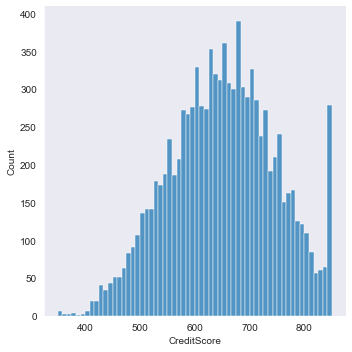

In [9]:
sns.displot(df, x='CreditScore',bins=60)

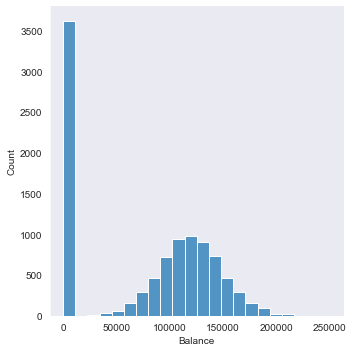

In [10]:
sns.displot(df, x='Balance')

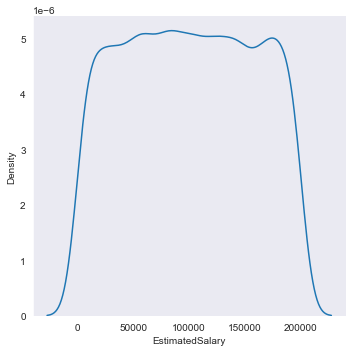

In [11]:
sns.displot(df, x='EstimatedSalary', kind='kde')

Metoda usuwania outlierow na rozkladow normalnych i normalno podobnych

In [12]:
from numpy import mean,std
def std_outlier(data):
    var = data
    var_mean, var_std = mean(var), std(var)
    cut_off = var_std*3
    lower, upper = var_mean-cut_off, var_mean+cut_off
    outliers = [x for x in var if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in var if x >= lower and x <= upper]
    print('Removed outliers: %d' % len(outliers_removed))
    return [outliers, outliers_removed]

Metoda usuwania outlierow dla danych ktore nie pochodza z rozkladu normalnego

In [13]:
from numpy import percentile
def iqr_outlier(data):
    var = data
    q25, q75 = percentile(var, 25), percentile(var, 75)
    iqr = q75-q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = [x for x in var if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in var if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    return [outliers, outliers_removed]

In [14]:
df_test=df

In [15]:
df_test=df_test[(df_test['CreditScore'].isin(iqr_outlier(df_test['CreditScore'])[1]))]

Percentiles: 25th=584.000, 75th=718.000, IQR=134.000
Identified outliers: 15
Non-outlier observations: 9985


In [16]:
df_test=df_test[(df_test['Age'].isin(iqr_outlier(df_test['Age'])[1]))]

Percentiles: 25th=32.000, 75th=44.000, IQR=12.000
Identified outliers: 359
Non-outlier observations: 9626


In [17]:
df_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
iqr_outlier(df['Balance'])[0]

Percentiles: 25th=0.000, 75th=127644.240, IQR=127644.240
Identified outliers: 0
Non-outlier observations: 10000


[]

In [19]:
iqr_outlier(df['EstimatedSalary'])[0]

Percentiles: 25th=51002.110, 75th=149388.247, IQR=98386.137
Identified outliers: 0
Non-outlier observations: 10000


[]

In [20]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


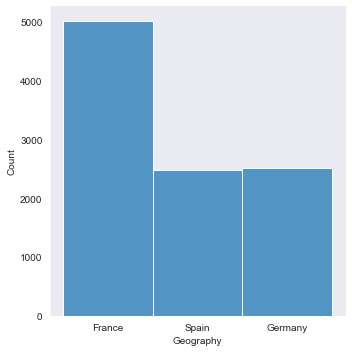

In [21]:
sns.displot(df, x='Geography')

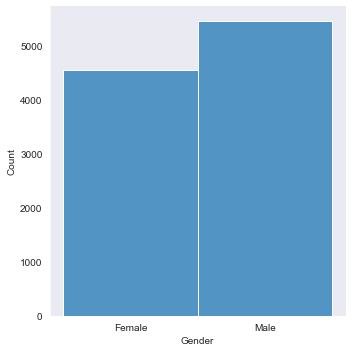

In [22]:
sns.displot(df, x='Gender')

In [23]:
bins = [17, 32, 59, 122]
labels = ['Young', 'MiddleAged', 'Old']
df_eda = df
df_eda['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df_eda.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,MiddleAged
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,MiddleAged
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,MiddleAged
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,MiddleAged
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,MiddleAged


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

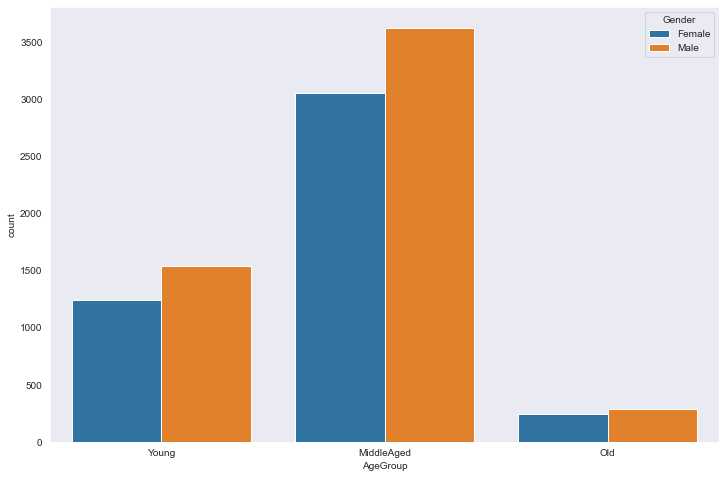

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_eda, x='AgeGroup', hue=df_eda['Gender'])

Sprawdzamy czy w tabeli znajdują się jakieś wartości 'null'

In [25]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
AgeGroup           0
dtype: int64

In [26]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,AgeGroup_Young,AgeGroup_MiddleAged,AgeGroup_Old
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,0,1,0


<AxesSubplot:>

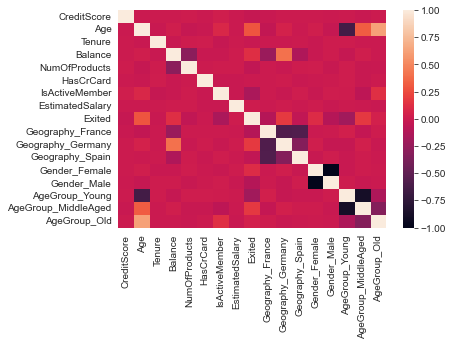

In [27]:
sns.heatmap(df_dummies.corr())

Sprawdzamy korelacje między zmienna 'Exited', a pozostałymi zmiennymi.

<AxesSubplot:>

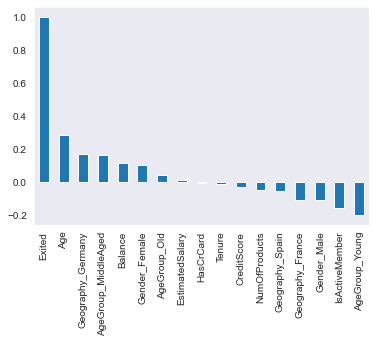

In [28]:
df_dummies.corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

Można zaobserwować że występuje pozytywna korelacja odejścia z banku z wiekiem, zamieszkaniem w Niemczech, stanem konta oraz płcią żeńska. Negatywnie skorelowane są natomiast bycie aktywnym klientem banku, płeć męska, oraz kraj zamieszkania Francja.

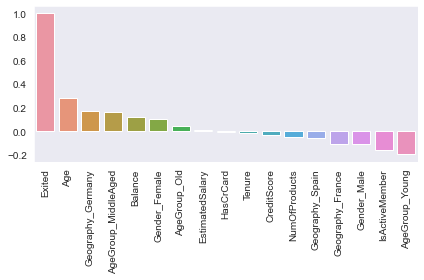

In [29]:
corr = df_dummies.corr()['Exited'].sort_values(ascending=False)
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.tight_layout()

In [30]:
df_test.drop(columns=['EstimatedSalary', 'HasCrCard'], inplace=True)

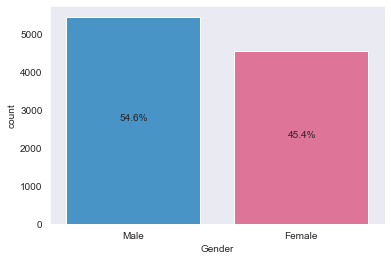

In [31]:
g_val = df['Gender'].value_counts()
ax = sns.countplot(x='Gender',data=df, order=g_val.index, palette=['#3498DB','#F06292'])
total = len(df['Gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.08
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage,(x,y))

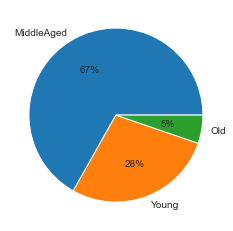

In [32]:
plt.pie(df_eda['AgeGroup'].value_counts(),labels=df_eda['AgeGroup'].unique(), autopct='%.0f%%')
plt.show()

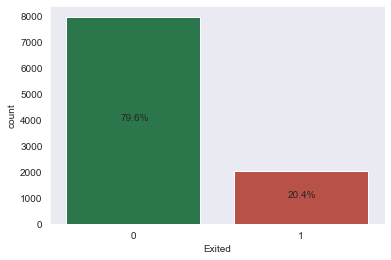

In [33]:
ax = sns.countplot(x='Exited',data=df, palette=['#1E8449','#CB4335'])
total = len(df['Exited'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.08
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage,(x,y))

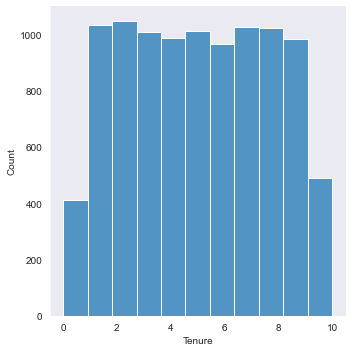

In [34]:
sns.displot(data=df,x='Tenure',bins=11)

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

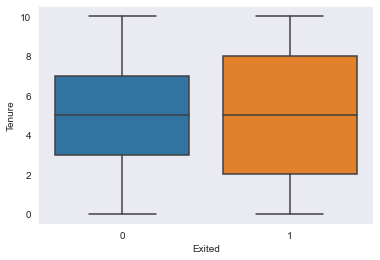

In [35]:
sns.boxplot(data=df, x='Exited', y='Tenure')

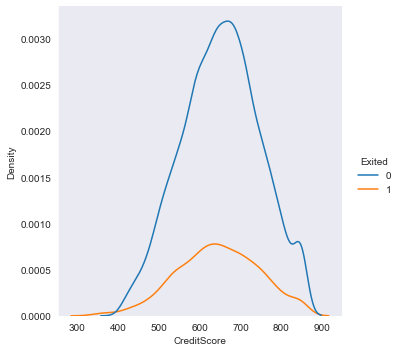

In [36]:
sns.displot(data=df, x='CreditScore', hue='Exited', kind='kde')

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

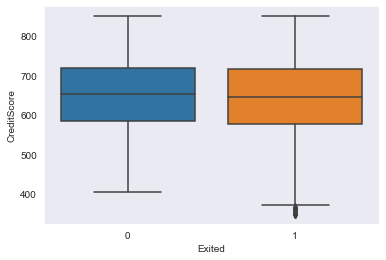

In [37]:
sns.boxplot(data=df, x='Exited', y='CreditScore')

<AxesSubplot:xlabel='Geography', ylabel='count'>

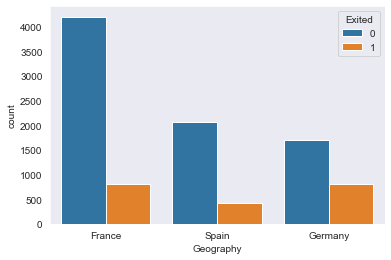

In [38]:
sns.countplot(data=df,x='Geography',hue='Exited')

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

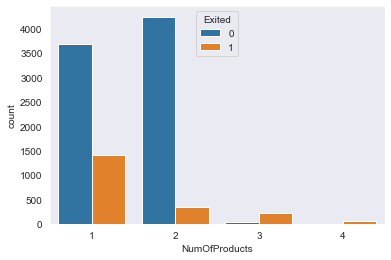

In [39]:
sns.countplot(data=df,hue='Exited', x='NumOfProducts')

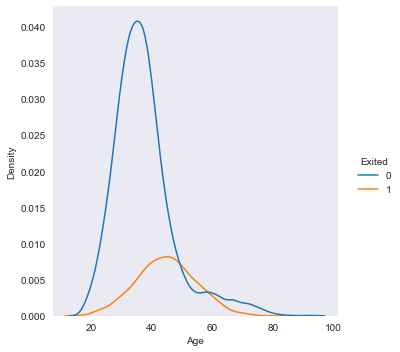

In [40]:
sns.displot(data=df, x='Age', hue='Exited', kind='kde')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

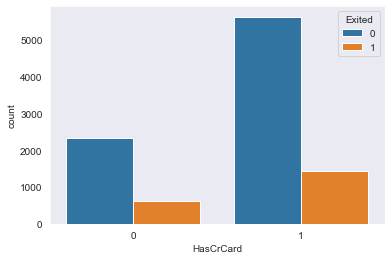

In [41]:
sns.countplot(data=df,x='HasCrCard',hue='Exited')

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

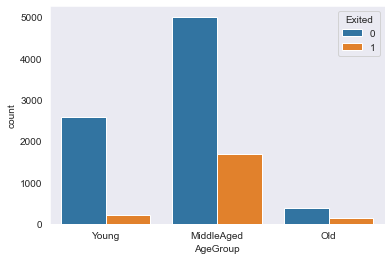

In [42]:
sns.countplot(data=df_eda,x='AgeGroup',hue='Exited')

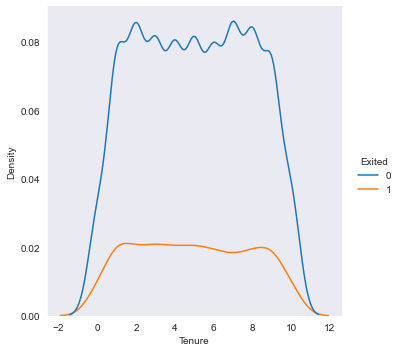

In [43]:
sns.displot(data=df, hue='Exited', x='Tenure', kind='kde')

Patrząc na wyżej przedstawione wykresy można dojść do wniosku, że bank ma problem z utrzymaniem klientów. Trzeba wziąć jednak pod uwagę, że w zbiorze występuje bardzo duża nierówność miedzy tym ile osób opuściło bank, a ile w nim zostało. Z tego powodu cieżko jednoznacznie stwierdzić co jest powodem. Widać jednak, że wraz ze wzrostem wieku klienci są bardziej skłonni do opuszczania banku. Co do wykresu przedstawiającego stosunek 'Exited' do 'NumOfProducts', bo można by się zastanawiać co się tam dzieje, wydaje mi się że fakt iż nie widzimy lepszego stosunku 'Exited' do 'NumOfProducts' wraz ze wzrostem 'NumOfProducts' wynika głownie z małej ilości danych chociaż uważam, że warto się temu przyjrzeć ponieważ rzeczywiście np. słaba jakość produktów oferowanych przez bank może mieć wpływ na ich frustracje i ostateczne opuszczenie banku. 

# Feature Engineering
 - Feature Extraction: select and/or combine variables into features to reduce the dimensionality of your dataset. (e.g. Principle Component Analysis, Nonlinear dimensionality reduction, unsupervised clustering methods)
 - Feature Selection: select the features which contribute most to the problem you are solving. (e.g. Variance thresholding, Pearson correlation, LASSO)
 - Feature Construction: the process of manually building more efficient features from raw data. (e.g. Dynamic aggregation of relational attributes)
 - Feature Learning: the automatic identification and use of features. (e.g. Restricted Boltzmann machine, K-means clustering)
 Using feature importance scoring methods, you can estimate how useful the  feature will be. Features are given scores so they can be ranked based on these scores.

Methods include:
 - the correlation coefficient between the feature and the target variable (the feature that you are trying to predict)
 - co-integration between two time series (for time-series data)
 - predictive models have embedded feature selection methods(e.g. Random Forest, Gradient Boosting Machine)
 - Chi-Squared test (between target and numerical variable)
 - Recursive Feature Elimination (EXPLAIN)

In [44]:
#df_test['NewAge'] = pd.qcut(df_test['Age'], 5, labels=[1,2,3,4,5])
#df_test.drop(columns='Age', inplace=True)

Wprowadzenie podzialu na grupy wieku konsumentow nie poprawia modelu w naszym przypadku.

In [45]:
#df_test["NewTenure"] = df_test["Tenure"]/df_test["Age"]
#df_test.drop(columns='Tenure', inplace=True)

Pamiętam o tym aby odpowiednio dobrac wagi ze wzgledu na to, że nasz zbiór nie jest równo rozłożony.

# Modelling

In [46]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Assuming 'y' contains the class labels (0s and 1s) for the binary classification problem
class_weights = calculate_class_weights(df['Exited'])
print("Class weights:", class_weights)

Class weights: {0: 0.6279040562602034, 1: 2.454590083456063}


In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error,r2_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

## Regresja logistyczna
https://pl.wikipedia.org/wiki/Regresja_logistyczna

In [48]:
y=df_dummies['Exited'].values
X=df_dummies.drop(columns='Exited')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

In [51]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import classification_report
y_pred=logit_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2620
           1       0.65      0.24      0.35       680

    accuracy                           0.82      3300
   macro avg       0.74      0.60      0.62      3300
weighted avg       0.79      0.82      0.78      3300



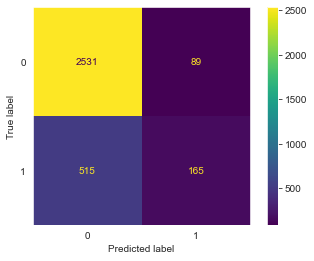

In [53]:
cm = confusion_matrix(y_test,y_pred)
cm_d = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [54]:
print(roc_auc_score(y_test,y_pred))

0.6043387965873372


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

In [57]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(class_weight='balanced')
logit_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [58]:
from sklearn.metrics import classification_report
y_pred=logit_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      2620
           1       0.40      0.73      0.51       680

    accuracy                           0.71      3300
   macro avg       0.65      0.72      0.66      3300
weighted avg       0.81      0.71      0.74      3300



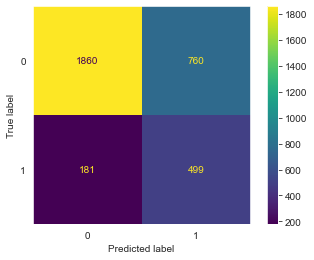

In [59]:
cm = confusion_matrix(y_test,y_pred)
cm_d = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [60]:
print(roc_auc_score(y_test,y_pred))

0.7218735967669511


ROC_AUC dla binary classification jest bardzo dobrym narzedziem do sprawdzenia jakosci modelu.\
Warto dodać macierz pomylek (confusion martix) w celu pokazania bledow 1 i 2 rodzaju.

Wersja z usunieciem outlierow

In [61]:
df_dummies = pd.get_dummies(df_test)
y=df_dummies['Exited'].values
X=df_dummies.drop(columns='Exited')

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(class_weight='balanced')
logit_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [63]:
from sklearn.metrics import classification_report
y_pred=logit_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2521
           1       0.41      0.71      0.52       656

    accuracy                           0.73      3177
   macro avg       0.66      0.72      0.66      3177
weighted avg       0.80      0.73      0.75      3177



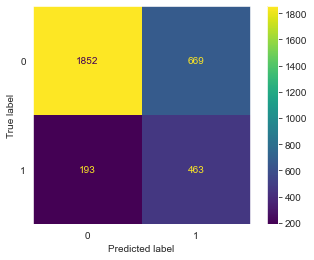

In [64]:
cm = confusion_matrix(y_test,y_pred)
cm_d = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [65]:
print(roc_auc_score(y_test,y_pred))

0.720210899178607


Zauważalna jest poprawa o średni 2%

## KNN
https://pl.wikipedia.org/wiki/K_najbli%C5%BCszych_s%C4%85siad%C3%B3w

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [67]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2521
           1       0.65      0.39      0.49       656

    accuracy                           0.83      3177
   macro avg       0.76      0.67      0.70      3177
weighted avg       0.81      0.83      0.81      3177



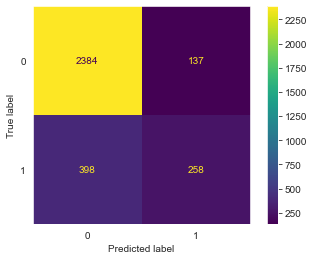

In [70]:
cm = confusion_matrix(y_test,y_pred)
cm_d = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [71]:
print(roc_auc_score(y_test,y_pred))

0.6694745842242239


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [73]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

In [74]:
pd.DataFrame(y_train).value_counts()

0    5156
1    1293
dtype: int64

In [75]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
X_ROS, y_ROS = oversample.fit_resample(X_train, y_train)

In [76]:
pd.DataFrame(y_ROS).value_counts()

0    5156
1    5156
dtype: int64

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_ROS, y_ROS)

KNeighborsClassifier()

In [78]:
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2521
           1       0.42      0.65      0.51       656

    accuracy                           0.74      3177
   macro avg       0.65      0.71      0.67      3177
weighted avg       0.79      0.74      0.76      3177



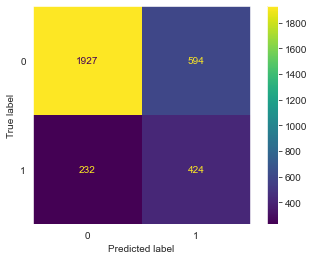

In [79]:
cm = confusion_matrix(y_test,y_pred)
cm_d = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [80]:
print(roc_auc_score(y_test,y_pred))

0.7053603390060081


Ważniejsza jest dla mnie statystyka recall dlatego, że chcemy uniknąć sytuacji w której model nie wyłapie tego, że ktoś opuścił nasz bank. Owszem recall w przypadku gdy mamy osobę która nie opuściła banku jest niższy ale to nie jest tak istotne.

Dlaczego użyłem RandomOverSampler https://iopscience.iop.org/article/10.1088/1757-899X/719/1/012072/pdf

## Drzewa i lasy losowe
https://pre-epodreczniki.open.agh.edu.pl/openagh-permalink_view.php?moduleId=2083&link=facccf589548c1e880246556fba8eab3

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [82]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

In [83]:
oversample=RandomOverSampler(sampling_strategy=1)
X_ROS, y_ROS = oversample.fit_resample(X_train, y_train)

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_ROS,y_ROS)

RandomForestClassifier()

In [85]:
y_pred=rfc_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2521
           1       0.63      0.54      0.58       656

    accuracy                           0.84      3177
   macro avg       0.76      0.73      0.74      3177
weighted avg       0.83      0.84      0.84      3177



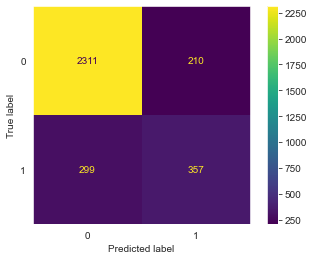

In [86]:
cm=confusion_matrix(y_test,y_pred)
cm_d=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [87]:
roc_auc_score(y_test,y_pred)

0.7304535197027893

In [88]:
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model=BalancedRandomForestClassifier()

Skorzystam w tym miejscu z innej metody oceny modelu tj. cross-validation-score z ocena modelu oparta wciaz na roc-auc

In [89]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=101)

In [90]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
score=cross_val_score(brfc_model,X,y,scoring='recall',cv=cv,n_jobs=1)

In [91]:
from statistics import mean
print('Mean ROC AUC:%.3f'% mean(score))

Mean ROC AUC:0.756


Przypomniało mi sie jeszcze zostawic to tutaj w razie jakis przyszlysz watpliwosci dotyczacych auc roc https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/

In [92]:
#from imblearn.ensemble import EasyEnsembleClassifier
#ee_model=EasyEnsembleClassifier(n_estimators=10)

In [93]:
#score=cross_val_score(ee_model,X,y,cv=cv,n_jobs=1)
#print('Mean ROC AUC:%.3f'% mean(score))

Nie warto :( Mean ROC AUC:0.781 a czas generowania o wiele dluzszy

In [94]:
y=df_dummies['Exited'].values
X=df_dummies.drop(columns='Exited')

In [95]:
from xgboost import XGBClassifier
gb_model=XGBClassifier(n_estimators=10)

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#X=pd.DataFrame(scaler.fit_transform(X))

In [97]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
#X, y = oversample.fit_resample(X, y)

In [98]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
pipeline=make_pipeline(scaler,oversample, gb_model)

In [99]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=101)
score=cross_val_score(pipeline,X,y,scoring='roc_auc',cv=cv,n_jobs=1)
print('Mean ROC AUC:%.3f'% mean(score))

Mean ROC AUC:0.857


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomoversampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_t...ow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None

In [101]:
from sklearn.metrics import classification_report
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2521
           1       0.50      0.71      0.58       656

    accuracy                           0.79      3177
   macro avg       0.71      0.76      0.72      3177
weighted avg       0.83      0.79      0.80      3177



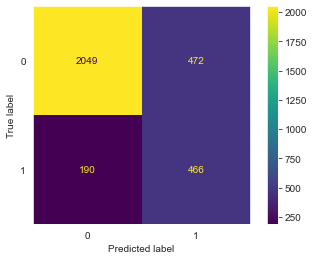

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_d=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7615692814504504

In [104]:
df_dummies = pd.get_dummies(df_test)
y=df_dummies['Exited'].values
X=df_dummies.drop(columns='Exited')
from xgboost import XGBClassifier
gb_model=XGBClassifier(n_estimators=10)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
pipeline=make_pipeline(scaler,oversample, gb_model)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from statistics import mean
cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=101)
score=cross_val_score(pipeline,X,y,scoring='roc_auc',cv=cv,n_jobs=1)
print('Mean ROC AUC:%.3f'% mean(score))

Mean ROC AUC:0.856


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomoversampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_t...ow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None

In [106]:
from sklearn.metrics import classification_report
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2521
           1       0.51      0.73      0.60       656

    accuracy                           0.80      3177
   macro avg       0.72      0.77      0.73      3177
weighted avg       0.84      0.80      0.81      3177



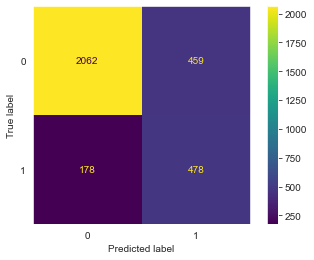

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_d=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [108]:
from sklearn.model_selection import cross_validate
cv=RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=101)
val=cross_validate(pipeline,X,y,scoring='roc_auc',cv=cv,n_jobs=1,return_train_score=True)

In [109]:
val

{'fit_time': array([0.04070354, 0.02752614, 0.03061819, 0.02955317, 0.02857566,
        0.02907133, 0.03160262, 0.03109455, 0.02853155]),
 'score_time': array([0.00601292, 0.00650573, 0.00600219, 0.00553298, 0.00599861,
        0.00651002, 0.00699997, 0.0075171 , 0.00699949]),
 'test_score': array([0.85248354, 0.84907626, 0.8654614 , 0.86208315, 0.85886494,
        0.85089665, 0.85756936, 0.85772327, 0.85253262]),
 'train_score': array([0.91212963, 0.90878884, 0.90188032, 0.90365112, 0.90823622,
        0.90927248, 0.90940848, 0.90930093, 0.90481491])}

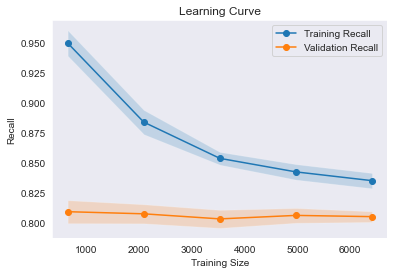

In [110]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Recall')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)

plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Recall')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [111]:
train_sizes

array([ 641, 2085, 3529, 4973, 6417])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
scaler=MinMaxScaler(feature_range=(0,1))
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))
oversample=RandomOverSampler(sampling_strategy=1)
X_ROS, y_ROS = oversample.fit_resample(X_train, y_train)
gb_model=XGBClassifier()
gb_model.fit(X_ROS,y_ROS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
pipeline.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomoversampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_t...ow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None

In [114]:
from sklearn.metrics import classification_report
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      2521
           1       0.50      0.72      0.59       656

    accuracy                           0.80      3177
   macro avg       0.71      0.77      0.73      3177
weighted avg       0.83      0.80      0.81      3177



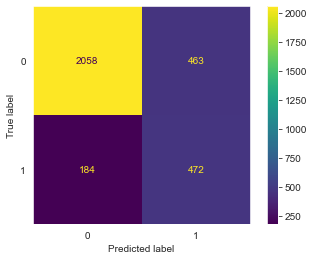

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
cm_d=ConfusionMatrixDisplay(confusion_matrix=cm)
cm_d.plot()
plt.show()

In [116]:
roc_auc_score(y_test,y_pred)

0.7679274581321774